<a href="https://colab.research.google.com/github/jmbanda/CSC4850-Machine-Learning/blob/main/ML_example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Machine Learning - Code Examples 1

In this notebook I will show you the basics of using scikit-learn with the classifiers we have seen in class up until logistic regression. Any of the functions and code here is allowed to be used in your homework assignments and final project with proper citations.

Some necesary library imports and making sure that plots are shown inline within the Colab notebooks.



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

The piece of code below generates an artificial dataset with 2 classes and 200 data points. I would recommend you play with this piece of code and parameters to generate your own test datasets. 

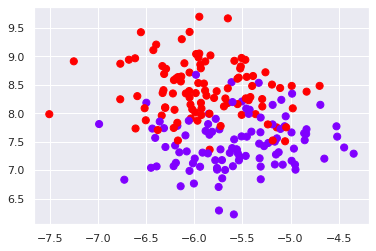

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=2,
                  random_state=5, cluster_std=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

# Decision tree example

Let's start by using scikit-learn to train a Decision Tree classifier. Note that we are NOT splitting the training set in TRAIN and TEST, here we are using the whole set to train the model. This is usually done in some scenarios were there isn't enough data, or when the model and parameters have been tuned and then the model will be used in 'production' for new data.

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

After training the model, we would like to visualize the separation of the classes. Thus, we define the following function. 

In [23]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Now, we visualize how well separated the classes are. 

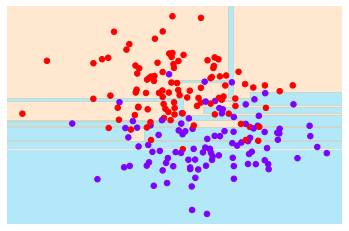

In [24]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Pretty nifty right? What do you think about the model? Is it overfitting? or not really? 

# Perceptron example

Let's move on with a perceptron model example now:

In [12]:
from sklearn.linear_model import Perceptron

m_perceptron = Perceptron(tol=1e-3, random_state=1234)

# train the perceptron object (m_perceptron)
m_perceptron.fit(X, y)

Perceptron(random_state=1234)

Let's print the coeficient and bias:

In [13]:
# print the coefficients matrix and bias
coefficients = m_perceptron.coef_;
bias = m_perceptron.intercept_;
print ("coefficients = " + str(coefficients))
print ("bias = " + str(bias))

coefficients = [[28.76907056 32.68558871]]
bias = [-49.]


Let's see how good is our model:

In [14]:
m_perceptron.score(X, y)

0.53

Let's plot our separator

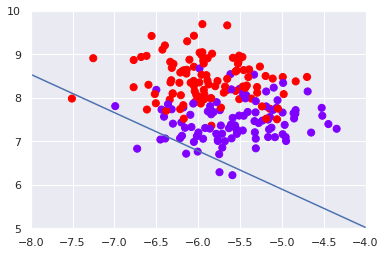

In [19]:
# print the decision boundry
# y = theta0 + theta1 * x1 + theta2 * x2 . . .
# y = bias + coefficients[0][0] * length + coefficients[0][1] * mass
# for plotting the decision boundry equally divide the x axis of the plot

xx1_length = np.linspace(start=-10, stop=10, num=100, endpoint=True)

# using the values of the equally divided x axis, calculate the y axis
# using the equation of perceptron (bias and coefficients)
yy = (-bias -(xx1_length * coefficients[0][0])) / coefficients[0][1];

# limit the plot area on x and y axises
plt.ylim([5,10])
plt.xlim([-8,-4])
# plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
# plot the decision boundry
plt.plot(xx1_length,yy)

Is this model any good? Clearly not! 

# Naive Bayes example

Instead of just doing a vanialla NB examples, let's do a fun one:

## Gaussian Naive Bayes (from the Python Data Science cookbook example)

Here, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

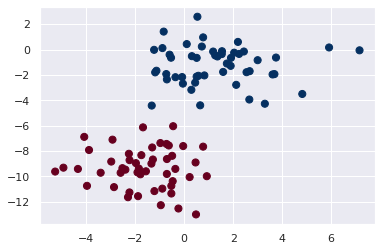

In [28]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.
This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.
The result of this naive Gaussian assumption is shown in the following figure:

[(-15.0, 5.0), (-8.0, 8.0)]

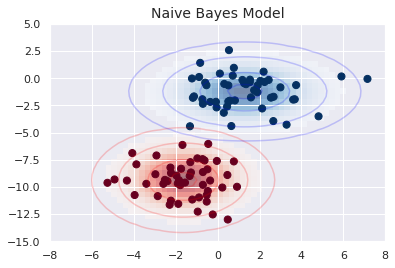

In [27]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Now let's generate some new data and predict the label:

In [30]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

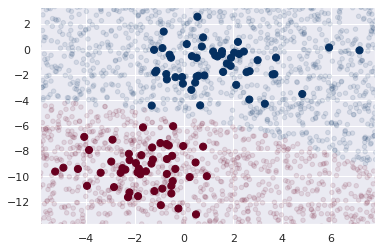

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [32]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

# Logistic Regression example

We will train a Logistic Regression model on our original data. 

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

Let's make new data to make predictions using the trained model. Let's see the predictions as well. 

In [35]:
X_new, y_new = make_blobs(n_samples=200, centers=2, random_state=6, cluster_std=0.5)

y_pred = logreg.predict(X_new)
print(y_pred)

[0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0
 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0
 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0]


How is our model doing? Let's show the confusion matrix:

In [36]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_new, y_pred)
print(cnf_matrix)

[[  0 100]
 [100   0]]


Is this good or bad? what do you think?

# Sources 

Some code (mostly for figures) has been sourced from: http://shop.oreilly.com/product/0636920034919.do